# Alzheimer Disease and Healthy Aging Data in US

这个数据集是美国的阿兹海默病的数据集。下面简单调一下包并且载入一下数据。

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import re
import math
import matplotlib.pyplot as plt
import seaborn as sns

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('D:/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

D:/kaggle/input\Alzheimer Disease and Healthy Aging Data In US.csv


# load data

载入数据，存到 data 里。

In [2]:
file_path = 'D:/kaggle/input/Alzheimer Disease and Healthy Aging Data In US.csv'
data = pd.read_csv(file_path)
data.columns

D:\anaconda3\envs\pytorch\lib\site-packages\IPython\core\interactiveshell.py:3441: DtypeWarning: Columns (13,14) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


Index(['YearStart', 'YearEnd', 'LocationAbbr', 'LocationDesc', 'Datasource',
       'Class', 'Topic', 'Question', 'Data_Value_Unit', 'DataValueTypeID',
       'Data_Value_Type', 'Data_Value', 'Data_Value_Alt',
       'Low_Confidence_Limit', 'High_Confidence_Limit', 'Sample_Size',
       'StratificationCategory1', 'Stratification1', 'StratificationCategory2',
       'Stratification2', 'Geolocation', 'ClassID', 'TopicID', 'QuestionID',
       'LocationID', 'StratificationCategoryID1', 'StratificationID1',
       'StratificationCategoryID2', 'StratificationID2'],
      dtype='object')

## 数据摘要

标称数据包括:    
- LocationAbbr
- LocationDesc
- Datasource
- Class
- Topic
- Question
- Data_Value_Unit
- DataValueType
- StratificationCategory1
- Stratification1
- StratificationCategory2
- Stratification2
- Geolocation

其中有意义的包括: 
- LocationDesc
- Class
- Topic
- Question
- Data_Value_Type
- DataValueTypeID
- Stratification1
- Stratification2

而 StratificationCategory2 与 Datasource 为 unique

数值数据包括:
- YearStart
- YearEnd
- Data_Value
- Data_Value_Alt
- Low_Confidence_Limit
- High_Confidence_Limit
- Sample_size

其中有意义的包括:
- Data_Value
- YearStart
- YearEnd

Data_Value_Alt 与 Data_Value 值完全重合。数据集中缺失 Sample_size。

## 数据清洗

考虑到缺失 Sample_Size,因而 Data_Value 中以 MEAN 为量纲的数据无法使用，为统一数据集中的量纲，首先对数据集进行过滤。

In [3]:
data.columns = data.columns.str.replace('-', '_').str.lower()
data = data.loc[data['data_value_type']=="Percentage"]
data=data[['yearstart','yearend','locationdesc','class','topic','question','data_value_type','data_value','datavaluetypeid','stratification1','stratificationcategory2','stratification2']]
data

,yearstart,yearend,locationdesc,class,topic,question,data_value_type,data_value,datavaluetypeid,stratification1,stratificationcategory2,stratification2
0,2020,2020,Hawaii,Overall Health,Arthritis among older adults,Percentage of older adults ever told they have...,Percentage,26.3,PRCTG,50-64 years,NaN,NaN
1,2017,2017,Idaho,Mental Health,Lifetime diagnosis of depression,Percentage of older adults with a lifetime dia...,Percentage,24.0,PRCTG,50-64 years,NaN,NaN
2,2017,2017,Idaho,Overall Health,Arthritis among older adults,Percentage of older adults ever told they have...,Percentage,35.7,PRCTG,50-64 years,NaN,NaN
4,2020,2020,Indiana,Mental Health,Lifetime diagnosis of depression,Percentage of older adults with a lifetime dia...,Percentage,13.7,PRCTG,Overall,Gender,Male
5,2020,2020,Iowa,Overall Health,Prevalence of sufficient sleep,Percentage of older adults getting sufficient ...,Percentage,73.5,PRCTG,Overall,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
214456,2018,2018,Wyoming,Screenings and Vaccines,Colorectal cancer screening,Percentage of older adults who had either a ho...,Percentage,NaN,PRCTG,65 years or older,Race/Ethnicity,Native Am/Alaskan Native
214458,2015,2015,Wyoming,Smoking and Alcohol Use,Current smoking,Percentage of older adults who have smoked at ...,Percentage,NaN,PRCTG,65 years or older,Race/Ethnicity,Asian/Pacific Islander
214459,2017,2017,Wyoming,Overall Health,Self-rated health (fair to poor health),Percentage of older adults who self-reported t...,Percentage,NaN,PRCTG,Overall,Race/Ethnicity,Native Am/Alaskan Native
214460,2016,2016,Wyoming,Overall Health,Fall with injury within last year,Percentage of older adults who have fallen and...,Percentage,10.6,PRCTG,50-64 years,NaN,NaN


In [4]:
nominals = ['locationdesc','class','topic','question','data_value_type','datavaluetypeid','stratification1','stratification2']
numerics = ['data_value','yearstart','yearend']
# Convert column names into snake_case.
# data = data.iloc[[2]]

# Make views and dowloads numeric.
for col in ['data_value']:
#     data[col] = data[col].str.replace(',','')
    data[col] = data[col].astype('float')

# Output formte
pd.options.display.float_format = '{:.2f}'.format
data

,yearstart,yearend,locationdesc,class,topic,question,data_value_type,data_value,datavaluetypeid,stratification1,stratificationcategory2,stratification2
0,2020,2020,Hawaii,Overall Health,Arthritis among older adults,Percentage of older adults ever told they have...,Percentage,26.30,PRCTG,50-64 years,NaN,NaN
1,2017,2017,Idaho,Mental Health,Lifetime diagnosis of depression,Percentage of older adults with a lifetime dia...,Percentage,24.00,PRCTG,50-64 years,NaN,NaN
2,2017,2017,Idaho,Overall Health,Arthritis among older adults,Percentage of older adults ever told they have...,Percentage,35.70,PRCTG,50-64 years,NaN,NaN
4,2020,2020,Indiana,Mental Health,Lifetime diagnosis of depression,Percentage of older adults with a lifetime dia...,Percentage,13.70,PRCTG,Overall,Gender,Male
5,2020,2020,Iowa,Overall Health,Prevalence of sufficient sleep,Percentage of older adults getting sufficient ...,Percentage,73.50,PRCTG,Overall,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
214456,2018,2018,Wyoming,Screenings and Vaccines,Colorectal cancer screening,Percentage of older adults who had either a ho...,Percentage,NaN,PRCTG,65 years or older,Race/Ethnicity,Native Am/Alaskan Native
214458,2015,2015,Wyoming,Smoking and Alcohol Use,Current smoking,Percentage of older adults who have smoked at ...,Percentage,NaN,PRCTG,65 years or older,Race/Ethnicity,Asian/Pacific Islander
214459,2017,2017,Wyoming,Overall Health,Self-rated health (fair to poor health),Percentage of older adults who self-reported t...,Percentage,NaN,PRCTG,Overall,Race/Ethnicity,Native Am/Alaskan Native
214460,2016,2016,Wyoming,Overall Health,Fall with injury within last year,Percentage of older adults who have fallen and...,Percentage,10.60,PRCTG,50-64 years,NaN,NaN


## 标称属性

统计一下标称属性的缺失值的个数

Text(0.5, 1.0, 'nan value counts')

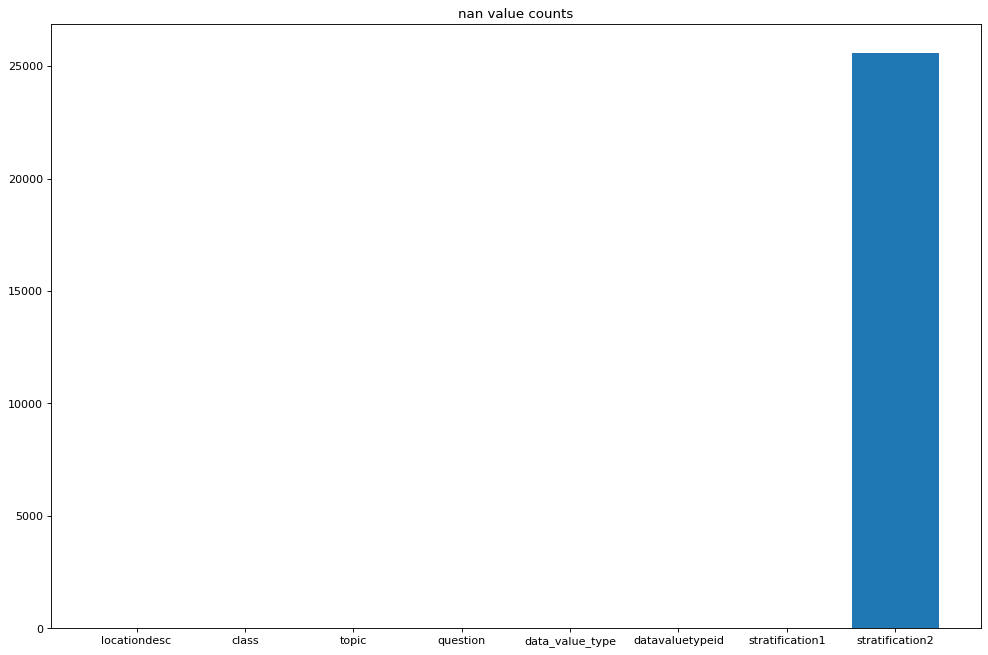

In [5]:
ax = nominals
ay = []
plt.figure(figsize=(15,10), dpi=80)
for attr in nominals:
    freq = 5
    ay.append(data[attr].isna().sum())
plt.bar(ax, ay)
plt.title(f'nan value counts')

### 标称属性的每个可能取值的频数

由 `.value_counts()` 取得，这里仅展示频度前五

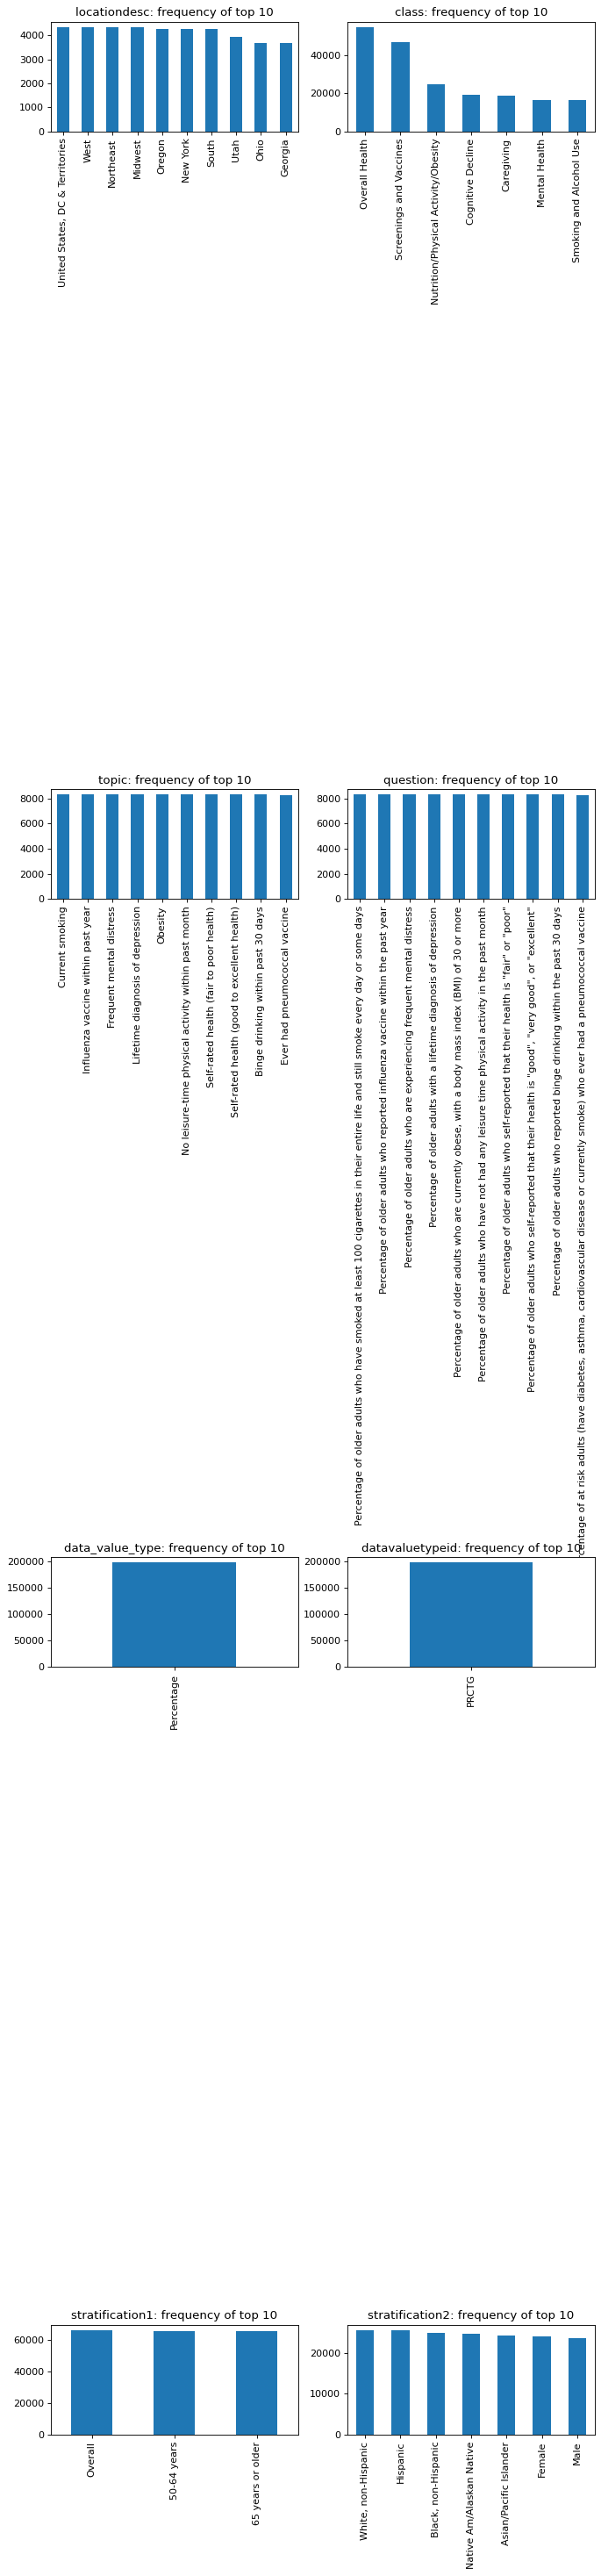

In [6]:
index = 1
plt.figure(figsize=(10,60), dpi=80).subplots_adjust(hspace=6)
plt.figure(1)
col = 2
row = int(len(nominals) / col) + 1
for attr in nominals:
    plt.subplot(row, col, index)
    index += 1
    freq = 10
    data[attr].value_counts().head(freq).plot.bar()
    plt.title(f'{attr}: frequency of top {freq}')

## 数值属性

数值属性的缺失值个数

Text(0.5, 1.0, 'nan value counts')

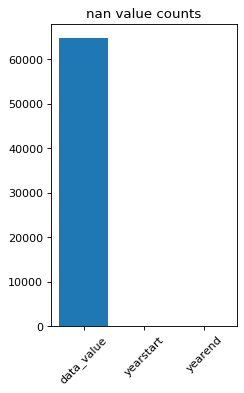

In [7]:
ax = range(len(numerics))
ay = []
plt.figure(figsize=(3,5), dpi=80)
for attr in numerics:
    freq = 5
    ay.append(data[attr].isna().sum())
plt.bar(ax, ay)
plt.xticks(ax, numerics, rotation=45)
plt.title(f'nan value counts')

## 数据属性的五数、盒图

### yearstart

处理时仅关注开始年份信息

count   197929.00
mean      2017.37
std          1.79
min       2015.00
25%       2016.00
50%       2017.00
75%       2019.00
max       2020.00
Name: yearstart, dtype: float64


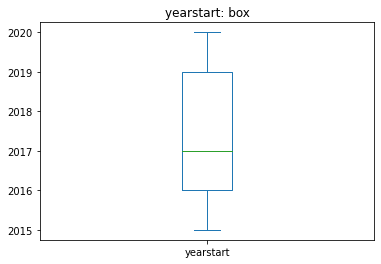

In [8]:
attr = 'yearstart'
print(data[attr].describe())
visit = pd.DataFrame(data[attr])
visit.plot.box()
plt.title(f'{attr}: box')
plt.show()

### yearend  

处理时仅关注终止年份信息

count   197929.00
mean      2017.65
std          1.78
min       2015.00
25%       2016.00
50%       2018.00
75%       2019.00
max       2020.00
Name: yearend, dtype: float64


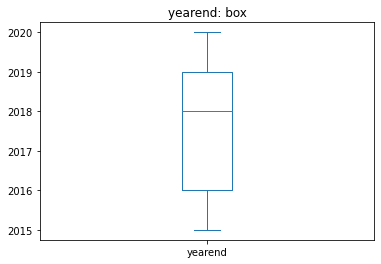

In [9]:
attr = 'yearend'
print(data[attr].describe())
visit = pd.DataFrame(data[attr])
visit.plot.box()
plt.title(f'{attr}: box')
plt.show()

### data value

count   133262.00
mean        40.03
std         24.42
min          0.00
25%         19.30
50%         35.10
75%         60.00
max        100.00
Name: data_value, dtype: float64


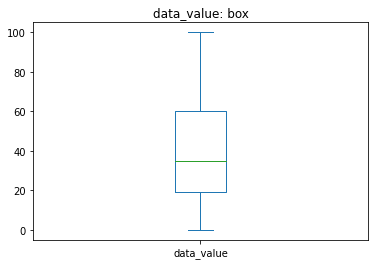

In [10]:
attr = 'data_value'
print(data[attr].describe())
visit = pd.DataFrame(data[attr])
visit.plot.box()
plt.title(f'{attr}: box')
plt.show()

# 缺失值处理

## 剔除

剔除 value 为空的数据后仅剩 133262 条数据 远少于原数据量 197929

In [11]:
new_data = data[data['data_value'].notnull()]
new_data

,yearstart,yearend,locationdesc,class,topic,question,data_value_type,data_value,datavaluetypeid,stratification1,stratificationcategory2,stratification2
0,2020,2020,Hawaii,Overall Health,Arthritis among older adults,Percentage of older adults ever told they have...,Percentage,26.30,PRCTG,50-64 years,NaN,NaN
1,2017,2017,Idaho,Mental Health,Lifetime diagnosis of depression,Percentage of older adults with a lifetime dia...,Percentage,24.00,PRCTG,50-64 years,NaN,NaN
2,2017,2017,Idaho,Overall Health,Arthritis among older adults,Percentage of older adults ever told they have...,Percentage,35.70,PRCTG,50-64 years,NaN,NaN
4,2020,2020,Indiana,Mental Health,Lifetime diagnosis of depression,Percentage of older adults with a lifetime dia...,Percentage,13.70,PRCTG,Overall,Gender,Male
5,2020,2020,Iowa,Overall Health,Prevalence of sufficient sleep,Percentage of older adults getting sufficient ...,Percentage,73.50,PRCTG,Overall,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
214451,2015,2020,Wyoming,Caregiving,Provide care for someone with cognitive impair...,Percentage of older adults who provided care f...,Percentage,8.60,PRCTG,Overall,NaN,NaN
214452,2016,2016,Wyoming,Overall Health,Self-rated health (good to excellent health),Percentage of older adults who self-reported t...,Percentage,80.40,PRCTG,Overall,Gender,Female
214454,2015,2015,Wyoming,Cognitive Decline,Need assistance with day-to-day activities bec...,Percentage of older adults who reported that a...,Percentage,20.10,PRCTG,50-64 years,Gender,Male
214455,2015,2020,Wyoming,Cognitive Decline,Need assistance with day-to-day activities bec...,Percentage of older adults who reported that a...,Percentage,18.70,PRCTG,65 years or older,NaN,NaN


## 标称属性变化

这里展示了 locationdesc, class, topic, question, data_value_type, datavaluetypeid 的变化。

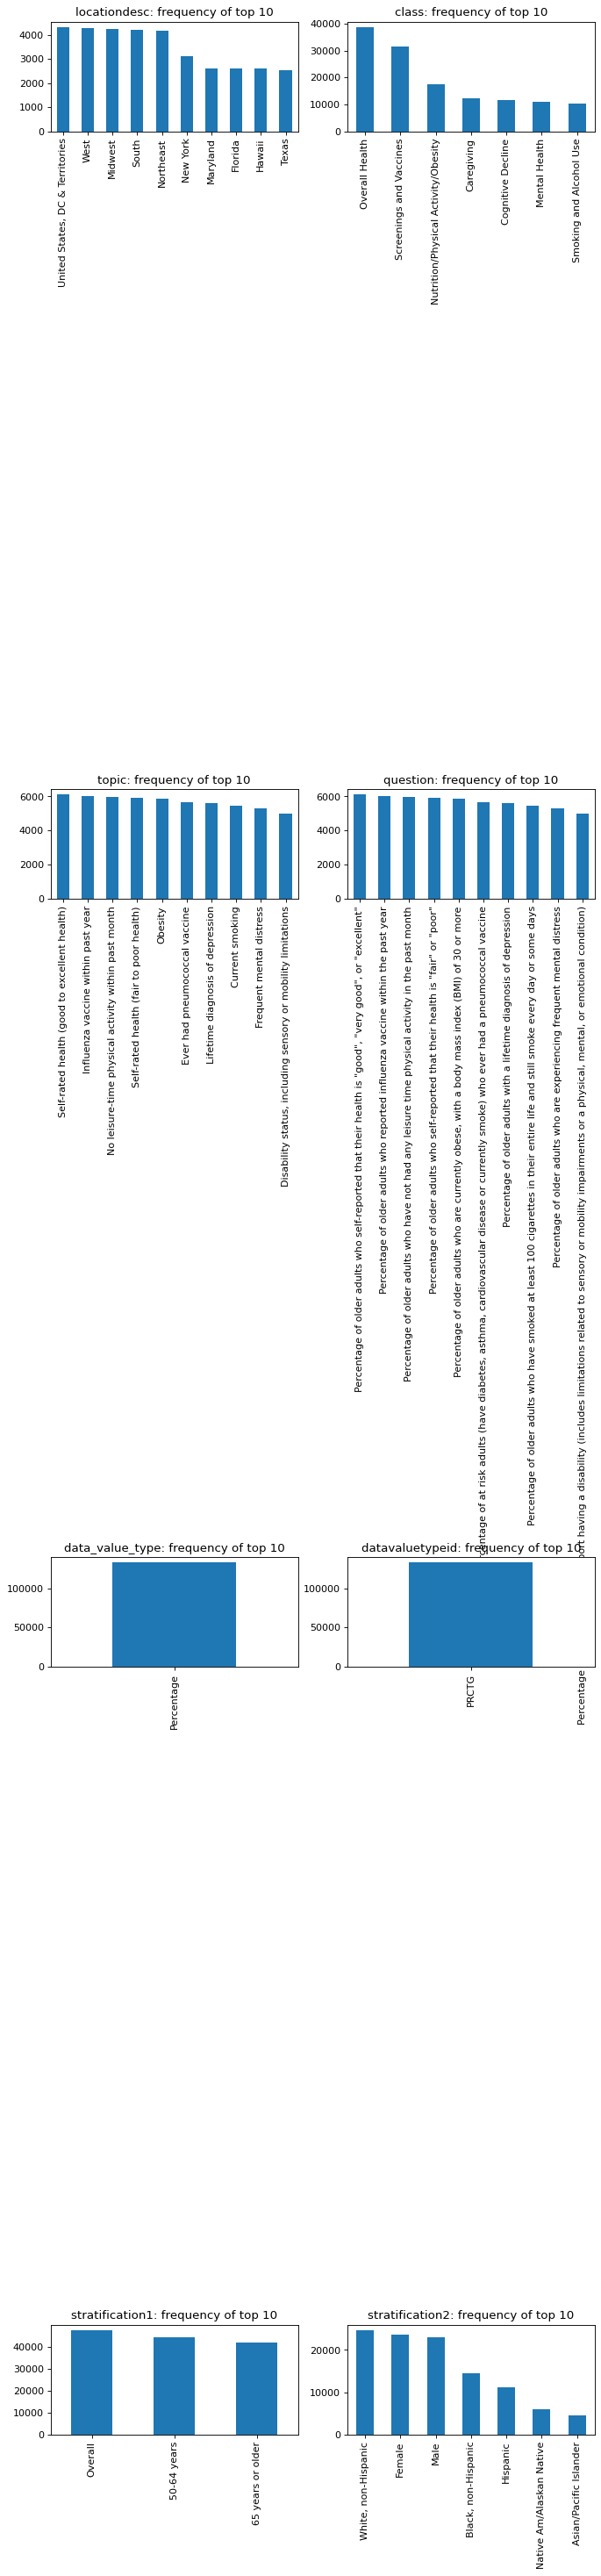

In [14]:
index = 1
plt.figure(figsize=(10,60), dpi=80).subplots_adjust(hspace=6)
plt.figure(1)
col = 2
row = int(len(nominals) / col) + 1
for attr in nominals:
    plt.subplot(row, col, index)
    index += 1
    freq = 10
    new_data[attr].value_counts().head(freq).plot.bar()
    plt.title(f'{attr}: frequency of top {freq}')

## 数值属性变化

这里展示了 yearstart, yearend, data_value 属性的变化。

yearstart
count   133262.00
mean      2017.38
std          1.77
min       2015.00
25%       2016.00
50%       2017.00
75%       2019.00
max       2020.00
Name: yearstart, dtype: float64


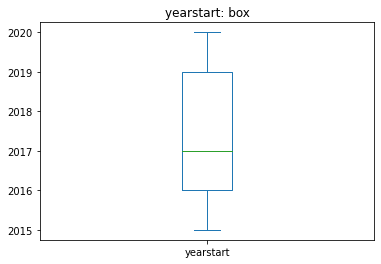

yearend
count   133262.00
mean      2017.63
std          1.77
min       2015.00
25%       2016.00
50%       2018.00
75%       2019.00
max       2020.00
Name: yearend, dtype: float64


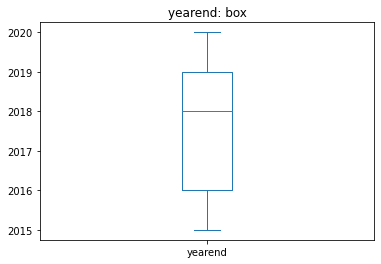

data_value
count   133262.00
mean        40.03
std         24.42
min          0.00
25%         19.30
50%         35.10
75%         60.00
max        100.00
Name: data_value, dtype: float64


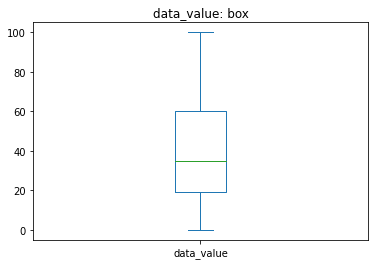

In [16]:
attr = 'yearstart'
print(attr)
print(new_data[attr].describe())
visit = pd.DataFrame(data[attr])
visit.plot.box()
plt.title(f'{attr}: box')
plt.show()
attr = 'yearend'
print(attr)
print(new_data[attr].describe())
visit = pd.DataFrame(data[attr])
visit.plot.box()
plt.title(f'{attr}: box')
plt.show()
attr = 'data_value'
print(attr)
print(new_data[attr].describe())
visit = pd.DataFrame(data[attr])
visit.plot.box()
plt.title(f'{attr}: box')
plt.show()


## 最高频率值填补

将数据中 NaN 的项用出现频率最高的值填充。

In [17]:
attrs = nominals + numerics
new_data = data.copy(deep=True)
for attr in attrs:
    most = data[attr].value_counts().index[0]
    new_data[attr] = data[attr].fillna(most)
new_data

,yearstart,yearend,locationdesc,class,topic,question,data_value_type,data_value,datavaluetypeid,stratification1,stratificationcategory2,stratification2
0,2020,2020,Hawaii,Overall Health,Arthritis among older adults,Percentage of older adults ever told they have...,Percentage,26.30,PRCTG,50-64 years,NaN,"White, non-Hispanic"
1,2017,2017,Idaho,Mental Health,Lifetime diagnosis of depression,Percentage of older adults with a lifetime dia...,Percentage,24.00,PRCTG,50-64 years,NaN,"White, non-Hispanic"
2,2017,2017,Idaho,Overall Health,Arthritis among older adults,Percentage of older adults ever told they have...,Percentage,35.70,PRCTG,50-64 years,NaN,"White, non-Hispanic"
4,2020,2020,Indiana,Mental Health,Lifetime diagnosis of depression,Percentage of older adults with a lifetime dia...,Percentage,13.70,PRCTG,Overall,Gender,Male
5,2020,2020,Iowa,Overall Health,Prevalence of sufficient sleep,Percentage of older adults getting sufficient ...,Percentage,73.50,PRCTG,Overall,NaN,"White, non-Hispanic"
...,...,...,...,...,...,...,...,...,...,...,...,...
214456,2018,2018,Wyoming,Screenings and Vaccines,Colorectal cancer screening,Percentage of older adults who had either a ho...,Percentage,11.10,PRCTG,65 years or older,Race/Ethnicity,Native Am/Alaskan Native
214458,2015,2015,Wyoming,Smoking and Alcohol Use,Current smoking,Percentage of older adults who have smoked at ...,Percentage,11.10,PRCTG,65 years or older,Race/Ethnicity,Asian/Pacific Islander
214459,2017,2017,Wyoming,Overall Health,Self-rated health (fair to poor health),Percentage of older adults who self-reported t...,Percentage,11.10,PRCTG,Overall,Race/Ethnicity,Native Am/Alaskan Native
214460,2016,2016,Wyoming,Overall Health,Fall with injury within last year,Percentage of older adults who have fallen and...,Percentage,10.60,PRCTG,50-64 years,NaN,"White, non-Hispanic"


### 标称属性变化

这里展示了 locationdesc, class, topic, question, data_value_type, datavaluetypeid 的变化。

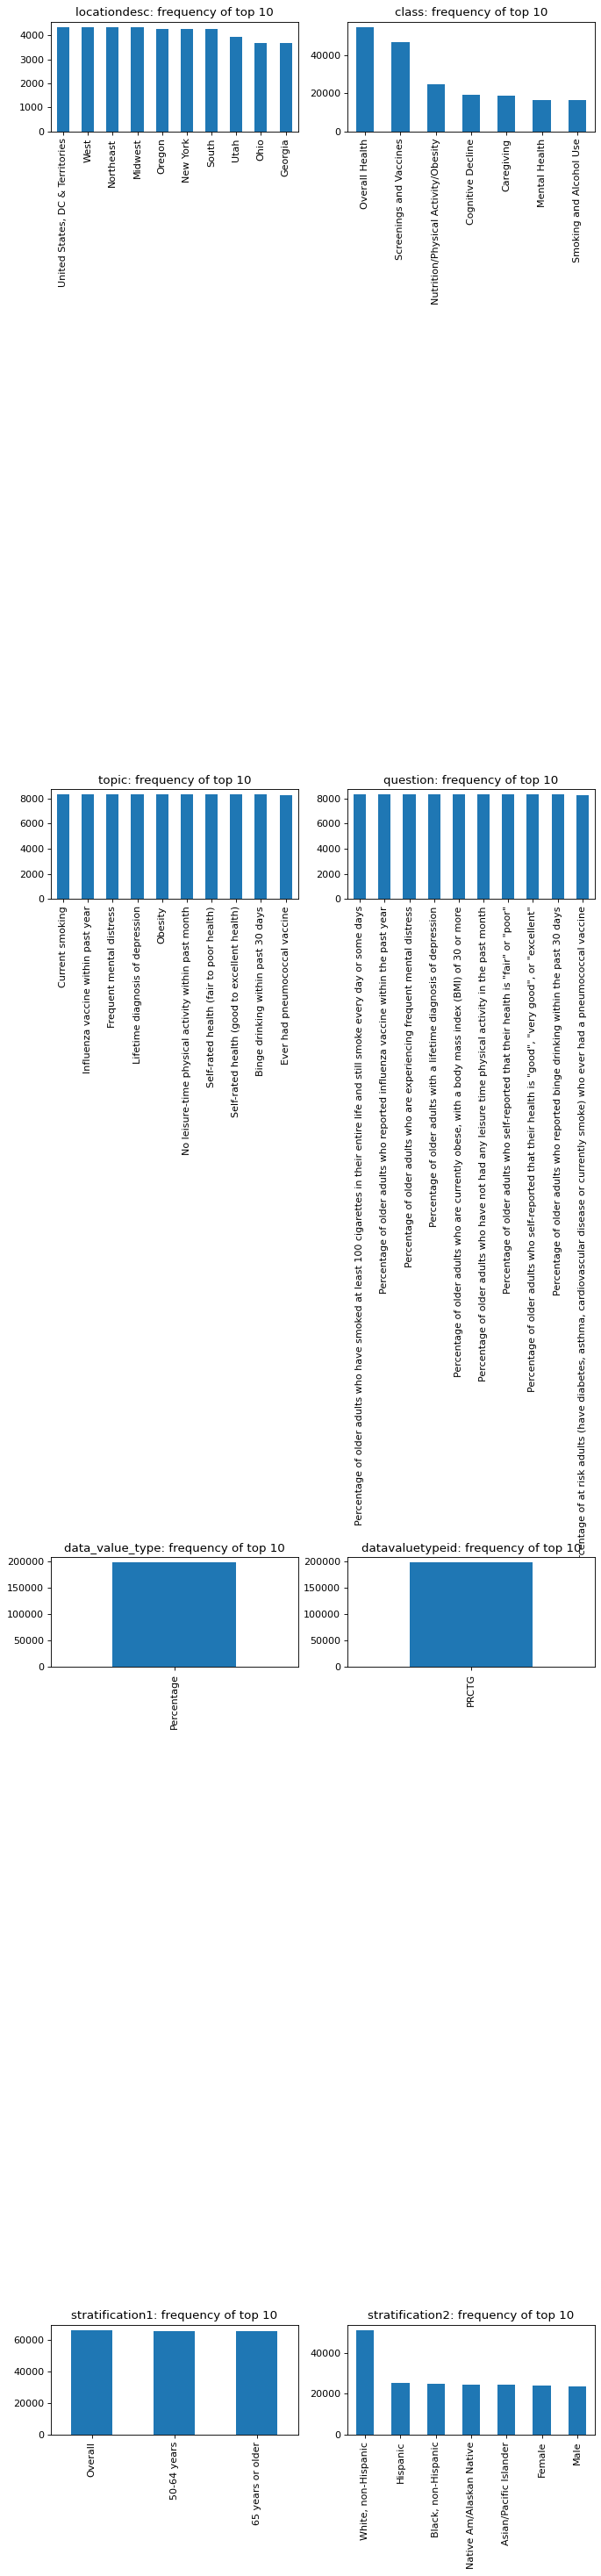

In [18]:
index = 1
plt.figure(figsize=(10,60), dpi=80).subplots_adjust(hspace=6)
plt.figure(1)
col = 2
row = int(len(nominals) / col) + 1
for attr in nominals:
    plt.subplot(row, col, index)
    index += 1
    freq = 10
    new_data[attr].value_counts().head(freq).plot.bar()
    plt.title(f'{attr}: frequency of top {freq}')

### 数值属性变化

这里展示了 yearstart, yearend, data_value 属性的变化。

yearstart
count   197929.00
mean      2017.37
std          1.79
min       2015.00
25%       2016.00
50%       2017.00
75%       2019.00
max       2020.00
Name: yearstart, dtype: float64


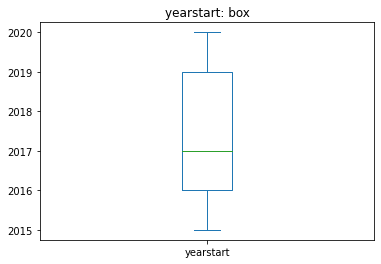

yearend
count   197929.00
mean      2017.65
std          1.78
min       2015.00
25%       2016.00
50%       2018.00
75%       2019.00
max       2020.00
Name: yearend, dtype: float64


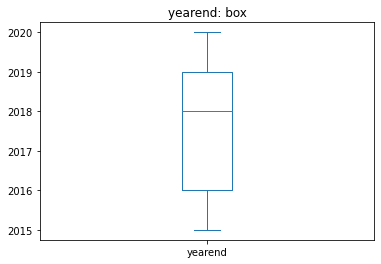

data_value
count   197929.00
mean        30.57
std         24.20
min          0.00
25%         11.10
50%         19.80
75%         44.70
max        100.00
Name: data_value, dtype: float64


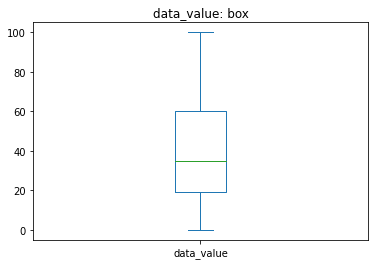

In [19]:
attr = 'yearstart'
print(attr)
print(new_data[attr].describe())
visit = pd.DataFrame(data[attr])
visit.plot.box()
plt.title(f'{attr}: box')
plt.show()
attr = 'yearend'
print(attr)
print(new_data[attr].describe())
visit = pd.DataFrame(data[attr])
visit.plot.box()
plt.title(f'{attr}: box')
plt.show()
attr = 'data_value'
print(attr)
print(new_data[attr].describe())
visit = pd.DataFrame(data[attr])
visit.plot.box()
plt.title(f'{attr}: box')
plt.show()


## 相关关系填补

先求出 yearstart, yearend, data_value 之间的关系矩阵。

可见 data_value 与调查的起始年份相关性较小，因此无法使用这一方法填补缺失值

In [20]:
new_data = data.copy(deep=True)
corr_matrix = new_data.corr()
corr_matrix

,yearstart,yearend,data_value
yearstart,1.00,0.79,0.05
yearend,0.79,1.00,0.00
data_value,0.05,0.00,1.00


## 基于相似性

对几个数值属性进行填补，可以使用 impyute 这个包进行填补。

In [21]:
!pip install impyute

Note: you may need to restart the kernel to use updated packages.


In [22]:
from impyute import fast_knn
features = ['yearstart', 'yearend','data_value']
new_data = data.copy(True)
new_data[features] = pd.DataFrame(fast_knn(np.array(new_data[features]), k=2), columns=features)
new_data.isnull().any()

D:\anaconda3\envs\pytorch\lib\site-packages\impyute\imputation\cs\fast_knn.py:113: RuntimeWarning: invalid value encountered in true_divide
  weights = distances/np.sum(distances)


yearstart                   True
yearend                     True
locationdesc               False
class                      False
topic                      False
question                   False
data_value_type            False
data_value                  True
datavaluetypeid            False
stratification1            False
stratificationcategory2     True
stratification2             True
dtype: bool

### 标称属性变化

这里展示了 locationdesc, class, topic, question, data_value_type, datavaluetypeid 的变化。

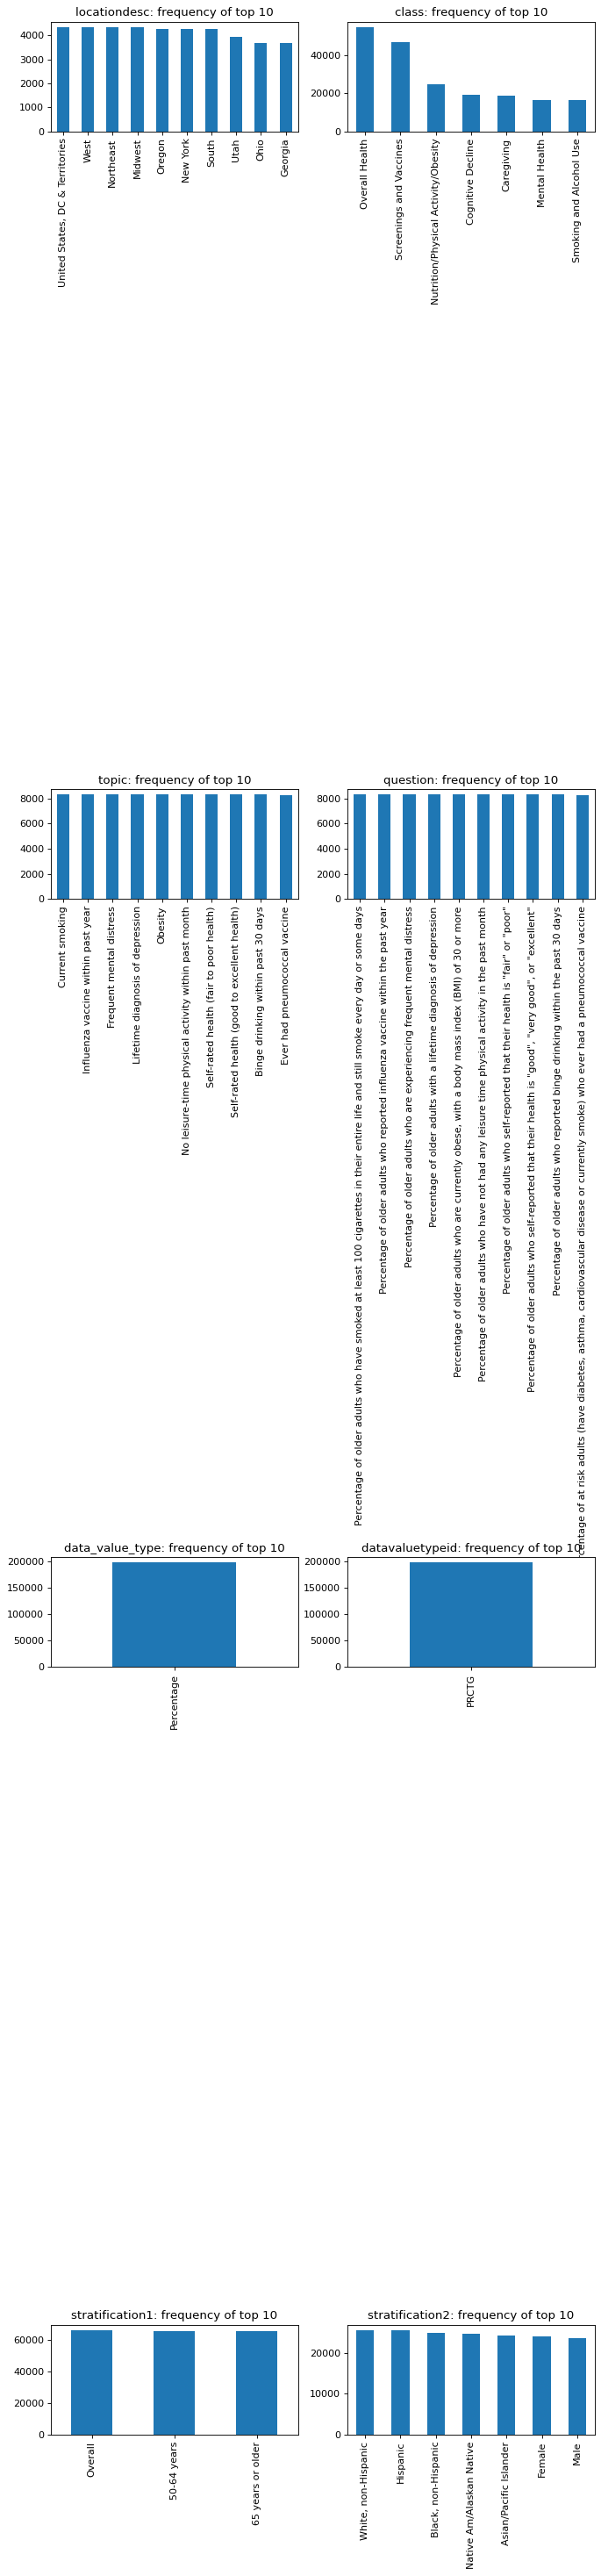

In [23]:
index = 1
plt.figure(figsize=(10,60), dpi=80).subplots_adjust(hspace=6)
plt.figure(1)
col = 2
row = int(len(nominals) / col) + 1
for attr in nominals:
    plt.subplot(row, col, index)
    index += 1
    freq = 10
    new_data[attr].value_counts().head(freq).plot.bar()
    plt.title(f'{attr}: frequency of top {freq}')

### 数值属性变化

这里展示了 yearstart, yearend, data_value 属性的变化。

yearstart
count   182664.00
mean      2017.37
std          1.79
min       2015.00
25%       2016.00
50%       2017.00
75%       2019.00
max       2020.00
Name: yearstart, dtype: float64


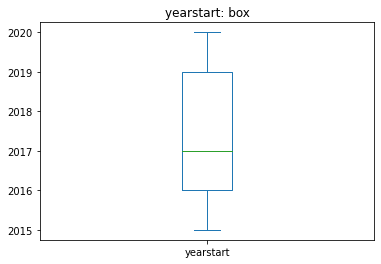

yearend
count   182664.00
mean      2017.65
std          1.78
min       2015.00
25%       2016.00
50%       2018.00
75%       2019.00
max       2020.00
Name: yearend, dtype: float64


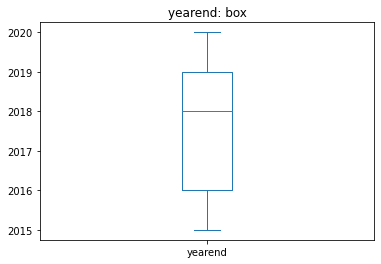

data_value
count   122975.00
mean        40.01
std         24.43
min          0.00
25%         19.30
50%         35.10
75%         60.00
max        100.00
Name: data_value, dtype: float64


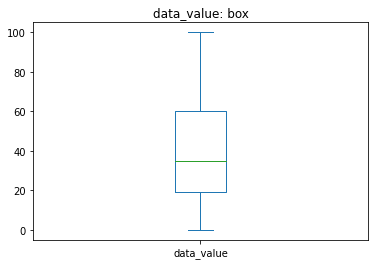

In [24]:
attr = 'yearstart'
print(attr)
print(new_data[attr].describe())
visit = pd.DataFrame(data[attr])
visit.plot.box()
plt.title(f'{attr}: box')
plt.show()
attr = 'yearend'
print(attr)
print(new_data[attr].describe())
visit = pd.DataFrame(data[attr])
visit.plot.box()
plt.title(f'{attr}: box')
plt.show()
attr = 'data_value'
print(attr)
print(new_data[attr].describe())
visit = pd.DataFrame(data[attr])
visit.plot.box()
plt.title(f'{attr}: box')
plt.show()